In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

Tenemos que R es 2(V-E) y S es 0

In [2]:
x = np.linspace(-5, 5, 1000)
psi = np.zeros_like(x)

In [3]:
def potencial(x):
    return 1/2*x**2

In [4]:
def numerov(psi,f ,x , E, p=1e-5):
    k = 2*(f(x)-E)
    h = x[1]-x[0]

    psi[0] = 0
    psi[1] = p

    for i in range(2, len(psi)):

        T1 = (1 - 1/12 * k[i] * h**2)
        T2 = 2*(1 + 5/12 * k[i-1] * h**2)*psi[i-1]
        T3 = (1 - 1/12 * k[i-2] * h**2)*psi[i-2]

        psi[i] = (T2 - T3)/T1

    return psi

In [5]:
dE = 0.001
E = np.linspace(0,6,601)
E_encontradas = np.array([])
count = 0
for e in E:
    psi1 = np.zeros_like(x)
    res1 = numerov(psi1,potencial,x,e)
    psi2 = np.zeros_like(x)
    res2 = numerov(psi2,potencial,x,e+dE)
    if res1[-1]*res2[-1]<0:
        count+=1
        E_encontradas = np.append(E_encontradas,e)
        print(f'La energía es: {e}')

    if count == 6:
        break

La energía es: 0.5
La energía es: 1.5
La energía es: 2.5
La energía es: 3.5
La energía es: 4.5
La energía es: 5.5


In [6]:
#E = np.array([0.5,1.5,2.5,3.5,4.5,5.5])
dE = 0.001
for e in E_encontradas:
    psi = np.zeros_like(x)
    res1 = numerov(psi, potencial, x, e)
    psi = np.zeros_like(x)
    res2 = numerov(psi, potencial, x, e+dE)
    frontera = res1[-1]*res2[-1]
    print("Condicion de frontera:" + str(frontera))

Condicion de frontera:-0.2642958962486801
Condicion de frontera:-0.011406636851064461
Condicion de frontera:-0.0005864888348077695
Condicion de frontera:-4.528833515020562e-05
Condicion de frontera:-4.8884252080125255e-06
Condicion de frontera:-6.558273561918037e-07


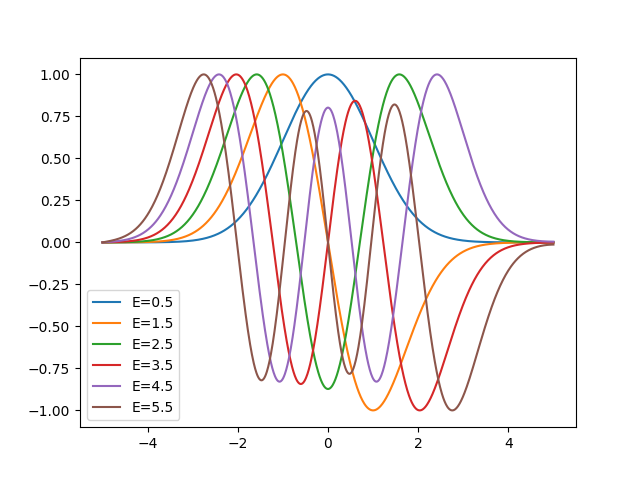

In [7]:
for e in E_encontradas:
    res = numerov(psi,potencial,x,e)
    res = res/max(res)
    plt.plot(x,res, label=f'E={e}')
plt.legend()
plt.show()

In [8]:
def potencial2(x):
    return -10*np.exp(-(x**2)/20)

In [9]:
x2 = np.linspace(-5,5,1000)
E2 = np.linspace(-10,0,10000)
dE = 0.001
E_encontradas = np.array([])
count = 0
for e in E2:
    psi2 = np.zeros_like(x2)
    res1 = numerov(psi2,potencial2,x2,e)
    psi2 = np.zeros_like(x2)
    res2 = numerov(psi2,potencial2,x2,e+dE)
    if res1[-1]*res2[-1]<0:
        count+=1
        E_encontradas = np.append(E_encontradas,e)
        print(f'La energía es: {e}')

    if count == 5:
        break

La energía es: -9.50995099509951
La energía es: -8.547854785478547
La energía es: -7.624762476247625
La energía es: -6.7416741674167415
La energía es: -5.898589858985899


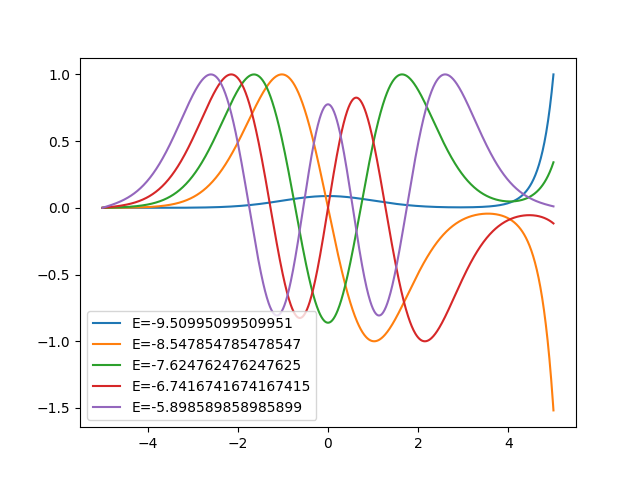

In [10]:
plt.figure()
#E_calculadas = np.array([-9.509394,-8.54738,-7.62425,-6.741,-5.8985])
for i in range(len(E_encontradas)):
    e = E_encontradas[i]
    res = numerov(psi,potencial2,x,e)
    res = res/max(res)
    plt.plot(x,res, label=f'E={e}')
plt.legend()
plt.show()

In [11]:
def potencial3(x):
    return -4/(1+x**2)**2

In [12]:
x3 = np.linspace(-10,10,1000)
E3 = np.linspace(-10,0,10000)
E_encontradas = np.array([])
count = 0
for e in E3:
    psi2 = np.zeros_like(x2)
    res1 = numerov(psi2,potencial3,x2,e)
    psi2 = np.zeros_like(x2)
    res2 = numerov(psi2,potencial3,x2,e+dE)
    if res1[-1]*res2[-1]<0:
        count+=1
        E_encontradas = np.append(E_encontradas,e)
        print(f'La energía es: {e}')
    if count == 10:
        break

La energía es: -2.472247224722472
La energía es: -0.4260426042604255


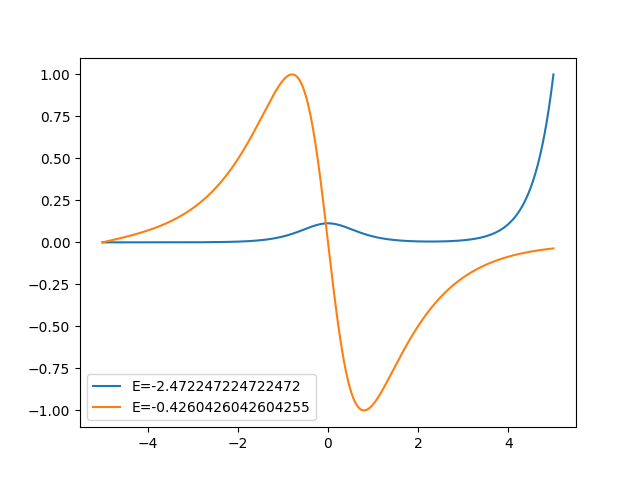

In [14]:
plt.figure()
#E_calculadas = np.array([-2.471345,-0.4255])
for i in range(len(E_encontradas)):
    e = E_encontradas[i]
    res = numerov(psi,potencial3,x,e)
    res = res/max(res)
    plt.plot(x,res, label=f'E={e}')
plt.legend()
plt.show()